# IA para E-Commers: Parte 1 Predicción de inventarios.


El problema de predicción de inventario es un desafío recurrente en la industria del comercio electrónico. Modelos de negocio como el *dropshipping* dependen fundamentalmente de una gestión eficiente de inventarios para garantizar entregas rápidas y minimizar costos operativos. Por ello, el análisis de esta problemática se vuelve esencial para la optimización de la cadena de suministro y la mejora en la toma de decisiones estratégicas.  

En esta sección, nos enfocamos en entrenar y desarrollar un producto de inteligencia artificial basado en redes neuronales recurrentes con múltiples salidas, orientado al pronóstico de ventas en almacenes de cadena, específicamente para Walmart. Este problema fue tomado de [Kaggle](https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data?authuser=1), en la que sugiere seguir una metodología basada en el **Cross-Industry Standard Process for Data Mining (CRISP-DM)**, un marco ampliamente utilizado en proyectos de minería de datos e inteligencia artificial.  

Dicha metodología se estructura en las siguientes etapas:  

### **1. Comprensión del Negocio**  
Todo producto tecnológico que aspire a ofrecer una solución rentable debe centrarse en el entendimiento del negocio. En el caso del pronóstico de ventas para Walmart, la precisión en la predicción del inventario impacta directamente la rentabilidad y eficiencia operativa. Sin embargo, más allá de este caso específico, es crucial evaluar el impacto de una solución similar en otros modelos de negocio, como pequeñas y medianas empresas o plataformas de comercio electrónico.  

### **2. Comprensión de los Datos**  
El insumo inicial de todo modelo de aprendizaje automático (ML) o inteligencia artificial (IA) son los datos. En este caso, más que simplemente utilizarlos como materia prima, buscamos comprenderla y mostrar cuál debería ser la información mínima necesaria para un negocio que aspire a desarrollar un modelo de pronóstico de ventas efectivo, capaz de apoyar la planificación de inventario.  

### **3. Preparación de los Datos**  
En esta etapa, realizamos la limpieza, transformación y estructuración de los datos para su uso en el modelo. Algunas de las tareas clave incluyen:  
- Manejo de valores faltantes y datos atípicos.  
- Generación de características (*feature engineering*), como tendencias de ventas, estacionalidad y efectos de días festivos.  
- Normalización y escalado de variables.  
- División del conjunto de datos en entrenamiento, validación y prueba.  

### **4. Modelado**  
Aquí implementamos una red neuronal recurrente (*Recurrent Neural Network*, RNN) con múltiples salidas, aprovechando su capacidad para capturar patrones temporales en series de tiempo. Se explorarán variantes como *Long Short-Term Memory* (LSTM) y *Gated Recurrent Units* (GRU) para mejorar el rendimiento del modelo. Además, se comparará el desempeño de estos modelos con enfoques más tradicionales, como ARIMA, para evaluar su eficacia.  

### **5. Evaluación**  
La validación del modelo se realizará utilizando métricas clave para problemas de series de tiempo, tales como:  
- **Error Absoluto Medio (MAE)**   
- **Error Porcentual Absoluto Medio (MAPE)**  

Se evaluará la capacidad del modelo para capturar tendencias de ventas y su estabilidad en distintos escenarios, incluyendo cambios en la demanda y eventos atípicos.  

### **6. Despliegue**  
Finalmente, el modelo se integrará en un sistema de producción que permita generar pronósticos segun los inputs suminisrados. Para ello, se desarrolló:  
1. **API en FastAPI** para servir las predicciones.  

2. **Dashboards interactivos** una herramienta web que permitirá visualizar pronósticos y tomar decisiones estratégicas en la gestión de inventario para este ejemplo particular.

3. **Otras 2 soluciones** basadas de redes neuronales artificales que pueden apoyar la evolución de los comercios electrónicos, estas dos solciones se presentan en las secciones xx.  


# 1. Comprensión de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas a los archivos CSV (ajusta según tu propia estructura)
TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'
FEATURES_PATH = 'features.csv'
STORES_PATH = 'stores.csv'  # En algunos datasets se llama 'stores.csv'

# Lectura de datos
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
features_df = pd.read_csv(FEATURES_PATH)
stores_df = pd.read_csv(STORES_PATH)  # Opcional, si el dataset está separado

# Mostrar el tamaño de cada DataFrame
print("Shape de train:", train_df.shape)
print("Shape de test:", test_df.shape)
print("Shape de features:", features_df.shape)
print("Shape de stores:", stores_df.shape)


Shape de train: (421570, 5)
Shape de test: (115064, 4)
Shape de features: (8190, 12)
Shape de stores: (45, 3)


In [2]:
# Información general de los DataFrames
print("=== TRAIN INFO ===")
train_df.info()
print("\n=== TEST INFO ===")
test_df.info()
print("\n=== FEATURES INFO ===")
features_df.info()
print("\n=== STORES INFO ===")
stores_df.info()
# Mostrar primeras filas
print("\n=== HEAD TRAIN ===")
display(train_df.head())


=== TRAIN INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB

=== TEST INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB

=== FEATURES INFO ===
<class 'pandas.core.frame.DataFrame'>
Ra

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


c:\Users\julia\Documentos\UNAL\Semestre 2024-ll\Redes neuronales y modelos bioinsipirados\Trabajo 3\model_forecast\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\julia\Documentos\UNAL\Semestre 2024-ll\Redes neuronales y modelos bioinsipirados\Trabajo 3\model_forecast\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


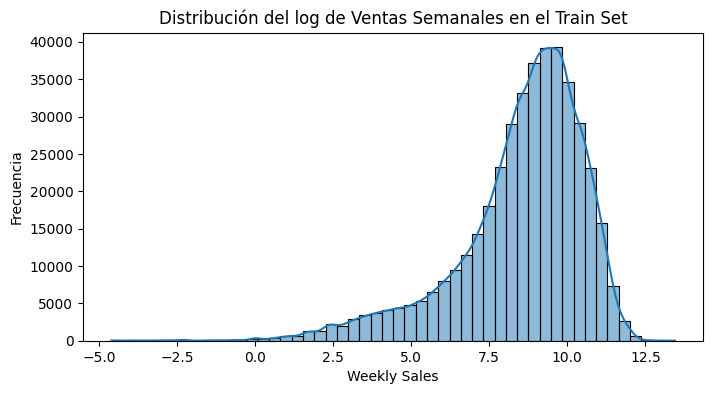

In [3]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log(train_df['Weekly_Sales']), bins=50, kde=True)
plt.title('Distribución del log de Ventas Semanales en el Train Set')
plt.xlabel('Weekly Sales')
plt.ylabel('Frecuencia')
plt.show()

In [4]:
# Convertir a tipo fecha si no lo está
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

print("Rango de fechas en TRAIN:", train_df['Date'].min(), "a", train_df['Date'].max())
print("Rango de fechas en TEST:", test_df['Date'].min(), "a", test_df['Date'].max())


Rango de fechas en TRAIN: 2010-02-05 00:00:00 a 2012-10-26 00:00:00
Rango de fechas en TEST: 2012-11-02 00:00:00 a 2013-07-26 00:00:00


In [4]:
# Unir features_df con stores_df si fuese el caso
features_df.drop(columns=['IsHoliday'], inplace=True)
features_stores_df = pd.merge(features_df, stores_df, how='left', on='Store')

# Unir train con features y stores
train_merged = pd.merge(train_df, features_stores_df, how='left', on=['Store', 'Date'])
test_merged = pd.merge(test_df, features_stores_df, how='left', on=['Store', 'Date'])

print("Shape de train_merged:", train_merged.shape)
print("Shape de test_merged:", test_merged.shape)

# Revisar columnas resultantes
train_merged.info()


Shape de train_merged: (421570, 16)
Shape de test_merged: (115064, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(1

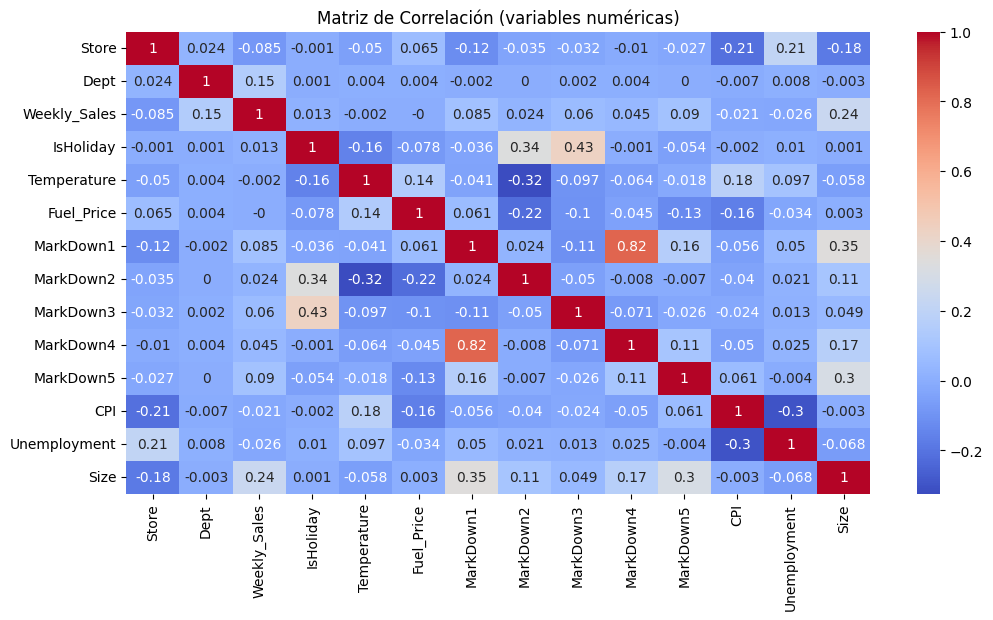

In [5]:
corr_matrix = train_merged.corr(numeric_only=True).round(3)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (variables numéricas)')
plt.show()


In [6]:
holiday_sales = train_df.groupby('IsHoliday')['Weekly_Sales'].describe()
display(holiday_sales)


,count,mean,std,min,25%,50%,75%,max
IsHoliday,,,,,,,,
False,391909.0,15901.445069,22330.747450,-4988.94,2079.75,7589.95,20131.21,406988.63
True,29661.0,17035.823187,27222.000409,-798.00,2078.54,7947.74,21189.25,693099.36


# Preparacion de los datos

# Modelo

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


El programa importa las librerías necesarias y carga un DataFrame, eliminando columnas irrelevantes y ordenando los datos por tienda, departamento y fecha. Luego, se imputan los valores faltantes utilizando forward fill y se generan nuevas variables temporales (año, mes, semana y día del año) a partir de la fecha. Además, se transforma la variable IsHoliday a entero y se codifican las variables categóricas (Store, Dept y Type) mediante LabelEncoder, creando identificadores numéricos. Finalmente, se normalizan las variables numéricas clave con StandardScaler, dejando el dataset preparado para análisis o modelado predictivo.

In [16]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import timedelta

##############################################
# 1) Carga y Preprocesamiento de Datos
##############################################

# Carga los datos (ajusta la ruta y el nombre del archivo)
df= train_merged.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis=1)

#df= train_merged.fillna(0)

#df = pd.read_csv('sales_data.csv', parse_dates=['Date'])

# Ordenar por tienda, depto y fecha
df.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# Imputación de valores faltantes (ejemplo: forward fill)
df.fillna(method='ffill', inplace=True)

# Crear variables temporales
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfYear'] = df['Date'].dt.dayofyear

# Convertir IsHoliday a entero (0/1)
# df["IsHoliday"] = df["IsHoliday"].astype(int)

df["IsHoliday"] = (
    df["IsHoliday"]
    .astype(str)                # Convierte todo a string
    .str.lower()                # Lo pasa a minúsculas ('True' -> 'true')
    .replace({'false': 0, 'true': 1, 'fal': 0})  # Mapea los valores a 0 y 1
    .astype(int)                # Convierte a entero
)

# Codificar variables categóricas
store_encoder = LabelEncoder()
dept_encoder = LabelEncoder()
type_encoder = LabelEncoder()

df['Store_id'] = store_encoder.fit_transform(df['Store'])
df['Dept_id'] = dept_encoder.fit_transform(df['Dept'])
df['Type_id'] = type_encoder.fit_transform(df['Type'])

# Variables numéricas para escalado y entrada
# Aquí se escalan algunas variables; se deja IsHoliday sin escalar
num_cols = [
    'Size', 'Temperature', 'Fuel_Price',
    #'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfYear'
]
all_num_cols = num_cols + ['IsHoliday']

# Escalado de las variables (excepto IsHoliday)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

C:\Users\julia\AppData\Local\Temp\ipykernel_16028\1580801283.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\julia\AppData\Local\Temp\ipykernel_16028\1580801283.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'false': 0, 'true': 1, 'fal': 0})  # Mapea los valores a 0 y 1


Aqui se define una función que divide el DataFrame en conjuntos de entrenamiento y prueba basándose en un horizonte temporal, extrae características temporales para entrenar un RandomForestRegressor y predice una variable exógena (por defecto, Temperature) para las próximas semanas, integrando estas predicciones al DataFrame original.

In [17]:
##############################################
# 2) (Opcional) Forecast de Variables Exógenas
##############################################

def forecast_exogenous_variable(df, var_name='Temperature', horizon=4):
    """
    Predice la variable exógena 'var_name' para las próximas 'horizon' semanas.
    """
    max_date = df['Date'].max()
    train_df = df[df['Date'] <= max_date - pd.Timedelta(weeks=horizon)]
    test_df = df[df['Date'] > max_date - pd.Timedelta(weeks=horizon)]

    X_train = train_df[['Year', 'Month', 'Week', 'DayOfYear']].values
    y_train = train_df[var_name].values
    X_test = test_df[['Year', 'Month', 'Week', 'DayOfYear']].values

    model_rf = RandomForestRegressor(n_estimators=50)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    test_df[var_name + '_pred'] = y_pred

    return pd.concat([train_df, test_df], ignore_index=True)

# Aplica el forecast si lo consideras útil (opcional)
df = forecast_exogenous_variable(df, var_name='Temperature', horizon=4)



KeyboardInterrupt: 

El código ordena el DataFrame por fecha, determina una fecha límite restando 10 semanas a la fecha máxima, y divide los datos en conjuntos de entrenamiento (fechas anteriores a la fecha límite) y prueba (fechas a partir de la fecha límite)

In [18]:
##############################################
# 3) División en Train y Test
##############################################

# Por ejemplo, dejamos las últimas 10 semanas para test
df_dates_sorted = df.sort_values('Date')
max_date = df_dates_sorted['Date'].max()
test_start_date = max_date - pd.Timedelta(weeks=30)

train_df = df[df['Date'] < test_start_date]
test_df = df[df['Date'] >= test_start_date]

El código define una clase personalizada de PyTorch para crear un dataset de series de tiempo, en el que cada serie se agrupa por tienda y departamento. Se generan secuencias de variables categóricas y numéricas de longitud fija, asignando como etiqueta el valor de ventas semanal un paso adelante en el tiempo. Posteriormente, se instancian datasets y se configuran DataLoaders para facilitar el entrenamiento y la evaluación de modelos en series de tiempo.

El train_dataset organiza los datos en secuencias temporales fijas, donde cada muestra consta de una secuencia de 8 pasos con variables categóricas y numéricas, y un valor objetivo de ventas semanales a predecir en el siguiente paso. Esta estructura se adapta perfectamente a la arquitectura de una red LSTM, que requiere entradas en forma de secuencias para capturar dependencias temporales. Al disponer de estos bloques de datos ya formateados, el proceso de entrenamiento se simplifica, permitiendo alimentar directamente la LSTM con batches de datos listos para aprender patrones a lo largo del tiempo.

En otras palabras la clase TimeSeriesDataset implementa una ventana móvil para extraer secuencias fijas de longitud seq_length a lo largo de cada serie temporal. Cada secuencia se obtiene desplazando la ventana un paso a la vez, generando múltiples ejemplos que luego se agrupan en lotes mediante el DataLoader para alimentar la red LSTM.


In [19]:
##############################################
# 4) Dataset de Series de Tiempo Global
##############################################

class TimeSeriesDataset(Dataset):
    def __init__(self, df, group_cols, cat_cols, num_cols, target_col,
                 seq_length=8, forecast_horizon=1):
        """
        df: DataFrame con todos los datos.
        group_cols: columnas para agrupar las series (usar 'Store_id' y 'Dept_id')
        cat_cols: variables categóricas (ej. ['Store_id', 'Dept_id', 'Type_id'])
        num_cols: variables numéricas (ej. all_num_cols)
        target_col: variable objetivo ('Weekly_Sales')
        seq_length: longitud de la secuencia de entrada.
        forecast_horizon: pasos a predecir (1 en este ejemplo).
        """
        self.df = df.copy()
        self.group_cols = group_cols
        self.cat_cols = cat_cols
        self.num_cols = num_cols
        self.target_col = target_col
        self.seq_length = seq_length
        self.forecast_horizon = forecast_horizon

        self.X_cat, self.X_num, self.y = self._create_sequences()

    def _create_sequences(self):
        X_cat_list, X_num_list, y_list = [], [], []
        # Agrupar por tienda y depto (cada serie es una combinación única)
        grouped = self.df.groupby(self.group_cols, sort=False)
        for _, group in grouped:
            group_sorted = group.sort_values(by='Date')
            cat_data = group_sorted[self.cat_cols].values
            num_data = group_sorted[self.num_cols].values
            target = group_sorted[self.target_col].values
            # Solo se generan secuencias si la serie es lo suficientemente larga
            for i in range(len(group_sorted) - self.seq_length - self.forecast_horizon + 1):
                X_cat_seq = cat_data[i : i+self.seq_length]
                X_num_seq = num_data[i : i+self.seq_length]
                y_val = target[i + self.seq_length + self.forecast_horizon - 1]
                X_cat_list.append(X_cat_seq)
                X_num_list.append(X_num_seq)
                y_list.append(y_val)
        return (
            np.array(X_cat_list, dtype=np.float32),
            np.array(X_num_list, dtype=np.float32),
            np.array(y_list, dtype=np.float32)
        )

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

# Parámetros del dataset
seq_length = 8
forecast_horizon = 1
target_col = 'Weekly_Sales'
cat_cols = ['Store_id', 'Dept_id', 'Type_id']

# Se crean datasets de train y test
train_dataset = TimeSeriesDataset(train_df,
                                  group_cols=['Store_id', 'Dept_id'],
                                  cat_cols=cat_cols,
                                  num_cols=all_num_cols,
                                  target_col=target_col,
                                  seq_length=seq_length,
                                  forecast_horizon=forecast_horizon)

test_dataset = TimeSeriesDataset(test_df,
                                 group_cols=['Store_id', 'Dept_id'],
                                 cat_cols=cat_cols,
                                 num_cols=all_num_cols,
                                 target_col=target_col,
                                 seq_length=seq_length,
                                 forecast_horizon=forecast_horizon)

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


El GlobalLSTM combina embeddings de variables categóricas con variables numéricas escaladas para formar secuencias de entrada a una LSTM. La red procesa estas secuencias, capturando la evolución temporal, y utiliza la salida del último paso para predecir la variable objetivo mediante una capa lineal. Esta arquitectura permite que el modelo integre información estática (como tienda o departamento) y dinámica (las variables numéricas) de forma eficiente para el forecasting en series de tiempo.

In [20]:
##############################################
# 5) Modelo GlobalLSTM
##############################################

class GlobalLSTM(nn.Module):
    def __init__(self,
                 num_stores,   # total de tiendas
                 num_depts,    # total de deptos
                 num_types,    # total de tipos (para el embedding de Type_id)
                 emb_dim_store=4,
                 emb_dim_dept=8,
                 emb_dim_type=2,
                 num_numeric_features=15,  # len(all_num_cols)
                 hidden_size=64,
                 num_layers=1,
                 dropout=0.2):
        super().__init__()

        # Embeddings para las variables categóricas
        self.store_emb = nn.Embedding(num_stores, emb_dim_store)
        self.dept_emb = nn.Embedding(num_depts, emb_dim_dept)
        self.type_emb = nn.Embedding(num_types, emb_dim_type)

        # Dimensión total de entrada al LSTM
        self.input_dim = emb_dim_store + emb_dim_dept + emb_dim_type + num_numeric_features

        self.lstm = nn.LSTM(input_size=self.input_dim,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X_cat, X_num):
        """
        X_cat: tensor de tamaño [batch, seq_length, 3] con [Store_id, Dept_id, Type_id]
        X_num: tensor de tamaño [batch, seq_length, num_numeric_features]
        """
        store_id = X_cat[:, :, 0].long()
        dept_id = X_cat[:, :, 1].long()
        type_id = X_cat[:, :, 2].long()

        store_emb_out = self.store_emb(store_id)
        dept_emb_out = self.dept_emb(dept_id)
        type_emb_out = self.type_emb(type_id)

        # Concatenar embeddings y variables numéricas
        concat_input = torch.cat([store_emb_out, dept_emb_out, type_emb_out, X_num], dim=-1)
        lstm_out, _ = self.lstm(concat_input)
        last_out = lstm_out[:, -1, :]  # Tomamos el último paso de la secuencia
        out = self.fc(last_out)
        # Aplicamos ReLU para asegurar que la salida sea >= 0
        out = torch.relu(out)
        return out.squeeze(-1)

# Parámetros del modelo
num_stores = df['Store_id'].nunique()    # 45 tiendas
num_depts = df['Dept_id'].nunique()        # 99 deptos (según tus datos)
num_types = df['Type_id'].nunique()

model = GlobalLSTM(
    num_stores=num_stores,
    num_depts=num_depts,
    num_types=num_types,
    emb_dim_store=4,
    emb_dim_dept=8,
    emb_dim_type=2,
    num_numeric_features=len(all_num_cols),
    hidden_size=64,
    num_layers=1,
    dropout=0.2
)

# Configurar dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

c:\Users\julia\Documentos\UNAL\Semestre 2024-ll\Redes neuronales y modelos bioinsipirados\Trabajo 3\model_forecast\venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


GlobalLSTM(
  (store_emb): Embedding(45, 4)
  (dept_emb): Embedding(81, 8)
  (type_emb): Embedding(3, 2)
  (lstm): LSTM(22, 64, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

El bloque de código entrena el modelo GlobalLSTM durante 10 épocas usando el error cuadrático medio (MSE) como función de pérdida y el optimizador Adam. En cada época, se procesa cada batch de datos, se calculan las predicciones y se actualizan los parámetros del modelo en función de la pérdida. Tras el entrenamiento, se evalúa el modelo en el conjunto de test (sin cálculo de gradientes) para obtener un error promedio global, facilitando así la medición del desempeño del modelo en datos no vistos.

In [ ]:
##############################################
# 6) Entrenamiento y Evaluación (Error Promedio Global)
##############################################

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    total_loss = 0
    for X_cat_batch, X_num_batch, y_batch in train_loader:
        X_cat_batch = X_cat_batch.to(device)
        X_num_batch = X_num_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        preds = model(X_cat_batch, X_num_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X_cat_batch.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {avg_loss:.4f}")

# Evaluación en test (error promedio sobre todas las series)
model.eval()
test_losses = []
with torch.no_grad():
    for X_cat_batch, X_num_batch, y_batch in test_loader:
        X_cat_batch = X_cat_batch.to(device)
        X_num_batch = X_num_batch.to(device)
        y_batch = y_batch.to(device)
        preds = model(X_cat_batch, X_num_batch)
        loss = criterion(preds, y_batch)
        test_losses.append(loss.item() * X_cat_batch.size(0))
test_loss = np.sum(test_losses) / len(test_loader.dataset)
print(f"Test Loss (MSE Promedio Global): {test_loss:.4f}")

Epoch [1/100] - Loss: 221954664.9047
Epoch [2/100] - Loss: 217697207.8875
Epoch [3/100] - Loss: 213313350.7231
Epoch [4/100] - Loss: 209131666.6277
Epoch [5/100] - Loss: 204800855.7409
Epoch [6/100] - Loss: 200975452.7129
Epoch [7/100] - Loss: 197151297.2427
Epoch [8/100] - Loss: 193333890.0302
Epoch [9/100] - Loss: 189473553.8458
Epoch [10/100] - Loss: 186094312.8444
Epoch [11/100] - Loss: 182625656.3048
Epoch [12/100] - Loss: 179344935.8570
Epoch [13/100] - Loss: 175994501.9310
Epoch [14/100] - Loss: 173103716.0433
Epoch [15/100] - Loss: 170554460.0540
Epoch [16/100] - Loss: 166944805.7031
Epoch [17/100] - Loss: 163905794.1739
Epoch [18/100] - Loss: 161314474.1743
Epoch [19/100] - Loss: 158710047.6839
Epoch [20/100] - Loss: 155878929.6867
Epoch [21/100] - Loss: 153093798.8469
Epoch [22/100] - Loss: 151297855.3456
Epoch [23/100] - Loss: 148626965.5570
Epoch [24/100] - Loss: 146305249.9115
Epoch [25/100] - Loss: 143879610.3090
Epoch [26/100] - Loss: 141799063.1593
Epoch [27/100] - Loss

El código define la función predict_store_custom, la cual permite predecir las ventas semanales para una tienda específica, ya sea para un departamento en particular, para una lista de departamentos o, por defecto, para todos los departamentos disponibles en esa tienda. Además, la función permite definir el horizonte de pronóstico (por ejemplo, 1, 2 o más semanas) y utiliza un enfoque iterativo para múltiples pasos.

In [24]:
################################################################
# 7) Función de Predicción para una Tienda con la serie o depto
# seleccionada por el numero de semanas escogido.
###############################################################

def predict_store_custom(model, df, store_id, dept_ids=None,
                           seq_length=8, forecast_horizon=1,
                           cat_cols=None, num_cols=None, device='cpu'):
    """
    Predice las ventas semanales para una tienda y para uno o varios deptos.

    Parámetros:
      - model: Modelo entrenado (por ejemplo, GlobalLSTM).
      - df: DataFrame con los datos históricos (debe incluir la columna 'Date').
      - store_id: ID de la tienda a pronosticar.
      - dept_ids: Puede ser un único dept_id, una lista de dept_ids o None (para todos los deptos de la tienda).
      - seq_length: Longitud de la secuencia histórica (por ejemplo, 8).
      - forecast_horizon: Número de semanas a pronosticar (1, 2, ... n).
      - cat_cols: Lista de columnas categóricas (por ejemplo, ['Store_id', 'Dept_id', 'Type_id']).
      - num_cols: Lista de columnas numéricas (por ejemplo, all_num_cols).
      - device: Dispositivo para la predicción ('cpu' o 'cuda').

    Retorna:
      DataFrame con columnas: ['Store_id', 'Dept_id', 'Forecast_Week', 'Predicted_Weekly_Sales']
    """
    results = []

    # Si no se especifican deptos, se usan todos los de la tienda.
    if dept_ids is None:
        dept_ids = df[df['Store_id'] == store_id]['Dept_id'].unique()
    else:
        # Si se pasa un único valor, lo convertimos en lista.
        if not isinstance(dept_ids, (list, np.ndarray)):
            dept_ids = [dept_ids]

    for dept in dept_ids:
        # Filtramos y ordenamos la serie de la combinación tienda-depto por fecha.
        sub_df = df[(df['Store_id'] == store_id) & (df['Dept_id'] == dept)].sort_values('Date')

        # Verificamos que exista al menos una secuencia histórica suficiente.
        if len(sub_df) < seq_length:
            continue

        if forecast_horizon == 1:
            # Caso de pronóstico de 1 semana: usamos los últimos seq_length registros.
            last_seq = sub_df.iloc[-seq_length:]
            X_cat = torch.tensor(last_seq[cat_cols].values[np.newaxis, :, :], dtype=torch.float32).to(device)
            X_num = torch.tensor(last_seq[num_cols].values[np.newaxis, :, :], dtype=torch.float32).to(device)
            model.eval()
            with torch.no_grad():
                pred = model(X_cat, X_num)

            results.append({
                'Store_id': store_id,
                'Dept_id': dept,
                'Forecast_Week': 1,
                'Predicted_Weekly_Sales': pred.item()
            })
        else:
            # Pronóstico iterativo para múltiples semanas.
            # Iniciamos con los últimos seq_length registros históricos.
            current_seq = sub_df.iloc[-seq_length:].copy()
            for h in range(1, forecast_horizon + 1):
                X_cat = torch.tensor(current_seq[cat_cols].values[np.newaxis, :, :], dtype=torch.float32).to(device)
                X_num = torch.tensor(current_seq[num_cols].values[np.newaxis, :, :], dtype=torch.float32).to(device)
                model.eval()
                with torch.no_grad():
                    pred = model(X_cat, X_num)

                results.append({
                    'Store_id': store_id,
                    'Dept_id': dept,
                    'Forecast_Week': h,
                    'Predicted_Weekly_Sales': pred.item()
                })
                # Actualizamos la secuencia para el siguiente paso.
                # Determinamos la fecha del próximo período (sumando 1 semana a la última fecha de current_seq).
                last_date = current_seq['Date'].iloc[-1]
                next_date = last_date + pd.Timedelta(weeks=1)

                # Intentamos obtener del DataFrame una fila para esa fecha (si se dispone de pronósticos de variables exógenas).
                next_row_df = sub_df[sub_df['Date'] == next_date]
                if not next_row_df.empty:
                    new_row = next_row_df.iloc[0].copy()
                else:
                    # Si no existe, creamos una nueva fila basándonos en la última,
                    # actualizando las variables temporales.
                    new_row = current_seq.iloc[-1].copy()
                    new_row['Date'] = next_date
                    new_row['Year'] = next_date.year
                    new_row['Month'] = next_date.month
                    # isocalendar() devuelve un named tuple; accedemos a week
                    new_row['Week'] = next_date.isocalendar().week
                    new_row['DayOfYear'] = next_date.timetuple().tm_yday
                    # Aquí podrías actualizar variables exógenas (p.ej., Temperature, Fuel_Price)
                    # según un modelo o suponer que se mantienen constantes.

                # Convertimos new_row a DataFrame y concatenamos.
                new_row_df = pd.DataFrame([new_row])
                current_seq = pd.concat([current_seq, new_row_df], ignore_index=True)
                # Mantenemos la longitud de la secuencia removiendo la primera fila.
                current_seq = current_seq.iloc[1:].reset_index(drop=True)



    return pd.DataFrame(results)

# Definir columnas categóricas y numéricas según tu preprocesamiento
cat_cols = ['Store_id', 'Dept_id', 'Type_id']
# all_num_cols ya fue definido previamente, p.ej.: ['Size', 'Temperature', 'Fuel_Price', 'Year', 'Month', 'Week', 'DayOfYear', 'IsHoliday']

pred_df = predict_store_custom(model, df, store_id=0,
                               dept_ids = None,    # None para todos los deptos
                               seq_length=8,
                               forecast_horizon=1,
                               cat_cols=cat_cols,
                               num_cols=all_num_cols,
                               device=device)
print(pred_df)


    Store_id  Dept_id  Forecast_Week  Predicted_Weekly_Sales
0          0        0              1            34242.109375
1          0        1              1            51749.097656
2          0        2              1            17799.324219
3          0        3              1            36845.777344
4          0        4              1            35259.785156
..       ...      ...            ...                     ...
70         0       76              1            72428.789062
71         0       77              1            34319.808594
72         0       78              1            33425.992188
73         0       79              1             9943.660156
74         0       80              1                0.000000

[75 rows x 4 columns]


La función evaluate_model_on_test evalúa el modelo en el conjunto de prueba al recorrer cada tienda y departamento, extrayendo secuencias de longitud fija de datos históricos para predecir la venta semanal real de la siguiente fecha. Se recopilan las predicciones y se comparan con los valores reales, calculando métricas de error (MAE, MSE y MAPE) para medir el desempeño del modelo. El resultado final es un DataFrame con las predicciones y una impresión de las métricas de evaluación.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate_model_on_test(model, test_df, cat_cols, num_cols, seq_length=8, device='cuda'):
    """
    Evalúa el modelo en el conjunto de prueba, prediciendo semana a semana.
    Retorna un DataFrame con predicciones y calcula el error.
    """
    test_predictions = []
    stores = test_df['Store_id'].unique()

    for store_id in stores:
        depts = test_df[test_df['Store_id'] == store_id]['Dept_id'].unique()

        for dept in depts:
            sub_df = test_df[(test_df['Store_id'] == store_id) & (test_df['Dept_id'] == dept)].sort_values('Date')

            if len(sub_df) < seq_length:
                continue  # Saltar si no hay suficientes datos

            for i in range(len(sub_df) - seq_length):
                # Obtener la secuencia de entrada
                last_seq = sub_df.iloc[i:i + seq_length]
                X_cat = last_seq[cat_cols].values[np.newaxis, :, :]
                X_num = last_seq[num_cols].values[np.newaxis, :, :]

                # Convertir a tensores
                X_cat_t = torch.tensor(X_cat, dtype=torch.float32).to(device)
                X_num_t = torch.tensor(X_num, dtype=torch.float32).to(device)

                # Obtener predicción
                model.eval()
                with torch.no_grad():
                    pred = model(X_cat_t, X_num_t).item()

                # Registrar predicción con fecha real de la semana
                true_value = sub_df.iloc[i + seq_length]['Weekly_Sales']
                date_value = sub_df.iloc[i + seq_length]['Date']

                test_predictions.append({
                    'Store_id': store_id,
                    'Dept_id': dept,
                    'Date': date_value,
                    'Predicted_Weekly_Sales': pred,
                    'Actual_Weekly_Sales': true_value
                })

    pred_df = pd.DataFrame(test_predictions)
    epsilon = 1e-8
    pred_df['Actual_Weekly_Sales'] = pred_df['Actual_Weekly_Sales'].replace(0, epsilon)

    # Calcular métricas de error
    mae = mean_absolute_error(pred_df['Actual_Weekly_Sales'], pred_df['Predicted_Weekly_Sales'])
    mse = mean_squared_error(pred_df['Actual_Weekly_Sales'], pred_df['Predicted_Weekly_Sales'])
    mape = mean_absolute_percentage_error(pred_df['Actual_Weekly_Sales'], pred_df['Predicted_Weekly_Sales'])

    print(f"Evaluación del modelo en test:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nMAPE: {mape:.2f}")

    return pred_df

# Evaluar el modelo en el conjunto de prueba
test_pred_df = evaluate_model_on_test(model, test_df, cat_cols, all_num_cols, seq_length=8, device=device)

# Mostrar las primeras predicciones
test_pred_df


Evaluación del modelo en test:
MAE: 4190.43
MSE: 79061488.14
MAPE: 6179425.41


,Store_id,Dept_id,Date,Predicted_Weekly_Sales,Actual_Weekly_Sales
0,0,0,2012-05-25,24145.796875,16963.55
1,0,0,2012-06-01,23162.433594,16065.49
2,0,0,2012-06-08,23186.570312,17666.00
3,0,0,2012-06-15,24678.779297,17558.82
4,0,0,2012-06-22,20270.421875,16633.41
...,...,...,...,...,...
67150,44,79,2012-09-28,0.000000,508.37
67151,44,79,2012-10-05,0.000000,628.10
67152,44,79,2012-10-12,0.000000,1061.02
67153,44,79,2012-10-19,0.000000,760.01


In [28]:
test_pred_df[((test_pred_df['Store_id']==1) & (test_pred_df['Dept_id']==4))]

,Store_id,Dept_id,Date,Predicted_Weekly_Sales,Actual_Weekly_Sales
1720,1,4,2012-05-25,27647.757812,20657.98
1721,1,4,2012-06-01,27107.003906,18540.63
1722,1,4,2012-06-08,27896.267578,27297.35
1723,1,4,2012-06-15,27853.402344,26047.39
1724,1,4,2012-06-22,27778.949219,24467.72
1725,1,4,2012-06-29,29318.234375,22011.26
1726,1,4,2012-07-06,26900.511719,20850.59
1727,1,4,2012-07-13,26670.699219,20668.27
1728,1,4,2012-07-20,32131.199219,19608.00
1729,1,4,2012-07-27,29276.146484,17403.45


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

def plot_store_dept_series(pred_df, store_ids, dept_ids):
    """
    Grafica la serie de tiempo real vs. la predicha para cada combinación de store y dept.

    Parámetros:
      - pred_df: DataFrame con las columnas 'Store_id', 'Dept_id', 'Date',
                 'Predicted_Weekly_Sales' y 'Actual_Weekly_Sales'.
      - store_ids: Lista (o único valor) de IDs de tiendas a graficar.
      - dept_ids: Lista (o único valor) de IDs de departamentos a graficar.

    La función genera un gráfico para cada combinación (store, dept) e indica el MAPE.
    """
    # Asegurar que store_ids y dept_ids sean listas
    if not isinstance(store_ids, list):
        store_ids = [store_ids]
    if not isinstance(dept_ids, list):
        dept_ids = [dept_ids]

    # Número total de gráficos (combinaciones)
    n_plots = len(store_ids) * len(dept_ids)
    ncols = min(2, n_plots)
    nrows = (n_plots + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))

    # Si solo hay un gráfico, convertir axes a lista para iterar de forma uniforme
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    plot_index = 0
    for store in store_ids:
        for dept in dept_ids:
            # Filtrar el DataFrame para la combinación actual
            sub_df = pred_df[(pred_df['Store_id'] == store) & (pred_df['Dept_id'] == dept)]
            if sub_df.empty:
                continue  # Si no hay datos para esta combinación, la saltamos

            sub_df = sub_df.sort_values('Date')
            ax = axes[plot_index]

            # Graficar serie real y predicha
            ax.plot(sub_df['Date'], sub_df['Actual_Weekly_Sales'], label='Real', marker='o')
            ax.plot(sub_df['Date'], sub_df['Predicted_Weekly_Sales'], label='Predicho', marker='x')
            ax.set_title(f"Store {store} - Dept {dept}")
            ax.set_xlabel("Fecha")
            ax.set_ylabel("Weekly Sales")
            ax.legend()

            # Calcular MAPE y mostrarlo en el gráfico
            mape = mean_absolute_percentage_error(sub_df['Actual_Weekly_Sales'],
                                                    sub_df['Predicted_Weekly_Sales']) * 100
            ax.text(0.05, 0.95, f"MAPE: {mape:.2f}%", transform=ax.transAxes,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

            plot_index += 1

    plt.tight_layout()
    plt.show()


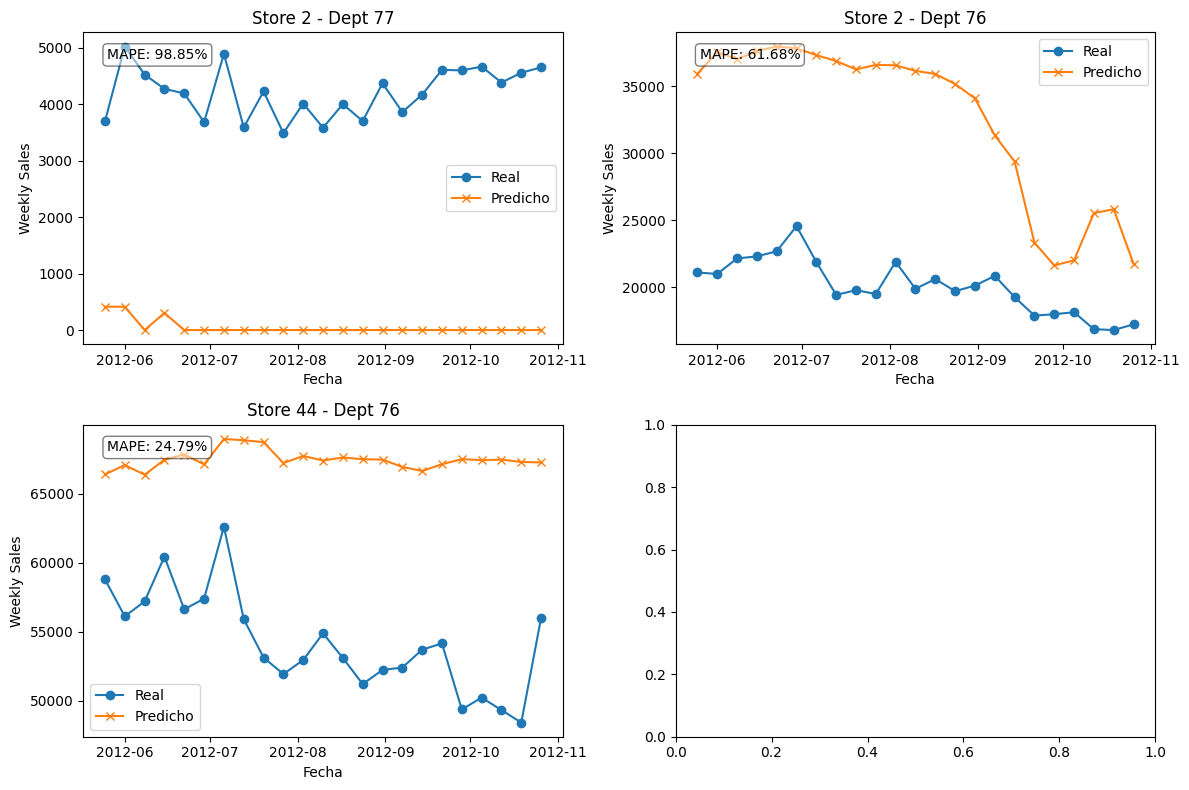

In [ ]:
plot_store_dept_series(pred_df=test_pred_df, store_ids=[2,44], dept_ids=[77,76])

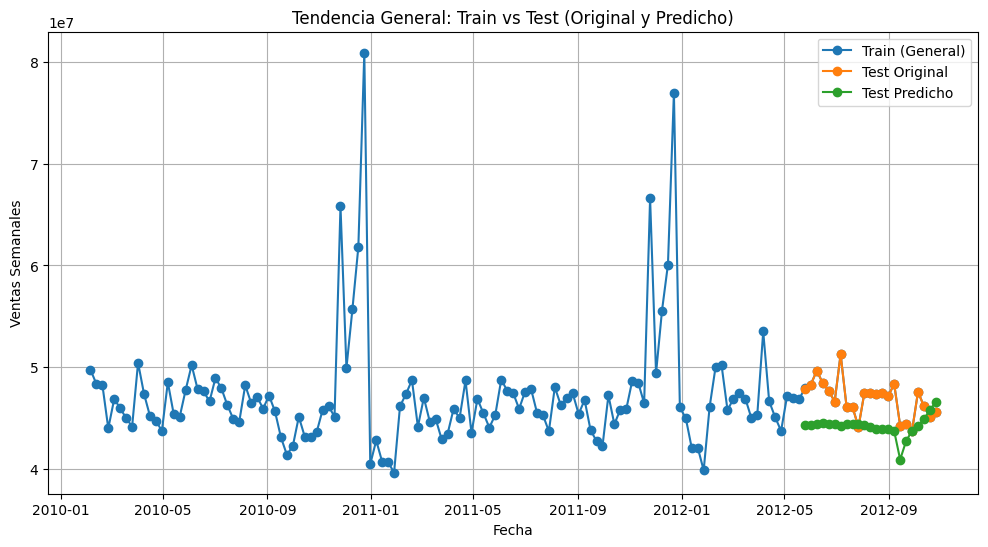

In [ ]:
import matplotlib.pyplot as plt

# 1. Agregar ventas en el conjunto de entrenamiento
# Se asume que df tiene una columna 'Weekly_Sales'
train_agg = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

# 2. Agregar ventas reales y predichas en el conjunto de test
test_actual_agg = test_pred_df.groupby("Date")["Actual_Weekly_Sales"].sum().reset_index()
test_pred_agg = test_pred_df.groupby("Date")["Predicted_Weekly_Sales"].sum().reset_index()

# 3. Graficar
plt.figure(figsize=(12,6))
plt.plot(train_agg["Date"], train_agg["Weekly_Sales"], label="Train (General)", marker="o")
plt.plot(test_actual_agg["Date"], test_actual_agg["Actual_Weekly_Sales"], label="Test Original", marker="o")
plt.plot(test_pred_agg["Date"], test_pred_agg["Predicted_Weekly_Sales"], label="Test Predicho", marker="o")

plt.xlabel("Fecha")
plt.ylabel("Ventas Semanales")
plt.title("Tendencia General: Train vs Test (Original y Predicho)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Guardar el state_dict del modelo
torch.save(model.state_dict(), "global_lstm_state.pth")

In [23]:
# Instanciar la arquitectura del modelo (con los mismos hiperparámetros)
model = GlobalLSTM(
    num_stores=num_stores,
    num_depts=num_depts,
    num_types=num_types,
    emb_dim_store=4,
    emb_dim_dept=8,
    emb_dim_type=2,
    num_numeric_features=len(all_num_cols),
    hidden_size=64,
    num_layers=1,
    dropout=0.2
)

# Cargar los parámetros guardados
model.load_state_dict(torch.load("models/global_lstm_state.pth", map_location=torch.device('cpu')))


#model.load_state_dict(torch.load("global_lstm_state.pth"),map_location=torch.device('cpu'))

model.to(device)

GlobalLSTM(
  (store_emb): Embedding(45, 4)
  (dept_emb): Embedding(81, 8)
  (type_emb): Embedding(3, 2)
  (lstm): LSTM(22, 64, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)